In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

#root_dir = "/content/gdrive/My Drive/"
#base_dir = root_dir + 'predictive_pollution/'
#data_dir = base_dir + "datasets/dataset1_5sec/"

data_dir = "datasets/dataset1_5sec/"
testdata = "datasets/dataset1_5sec/test"

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
import pandas as pd
import os

In [4]:
!ls

bg_lr_v2_5s_analyse.ipynb	 evaluation_learner_v2.ipynb
bigger_lr_learner_v2_5sec.ipynb  learner_v1.ipynb
bigger_lr_learner_v3_5sec.ipynb  learner_v2.ipynb
copy_engine_from_ESC-50.ipynb	 merge_dataframes.ipynb
create_dataset.ipynb		 README.md
create_spectogram.ipynb		 sac_test
datasets			 temp
edit_soundfiles.ipynb


In [5]:
path = Path(data_dir)

In [72]:
data = ImageDataBunch.from_folder(path = path)

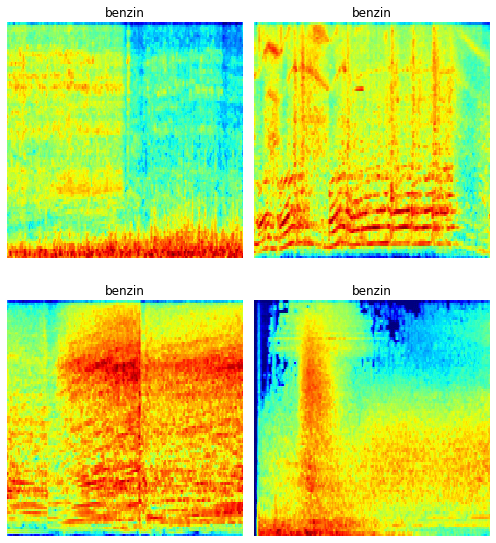

In [86]:
data2.show_batch(rows = 2, figsize=(7,8))

In [85]:
data2.test_ds[3][1]

EmptyLabel 

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['benzin', 'diesel'], 2, 5666, 1764)

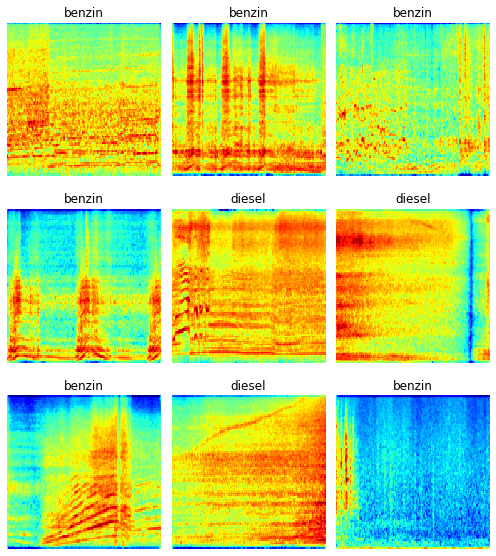

In [8]:
data.show_batch(rows = 3, figsize=(7,8))

# create model

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

# Interpretation

In [11]:
learn = learn.load('stage-2_ds1_5sec_bigger_lr')


In [12]:
interp = ClassificationInterpretation.from_learner(learn)

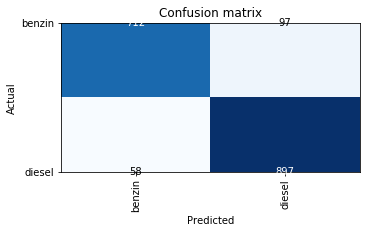

In [13]:
interp.plot_confusion_matrix(figsize=(5, 5))

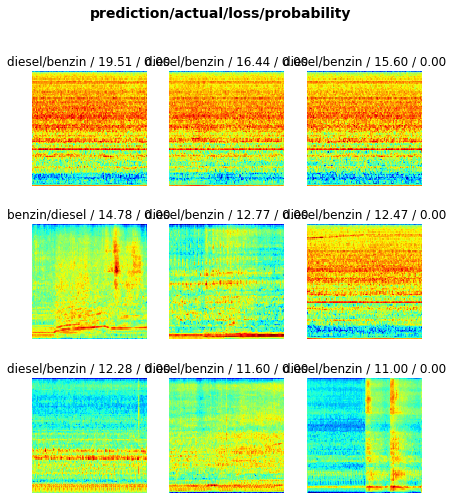

In [14]:
interp.plot_top_losses(9, figsize=(7,8), heatmap = False)

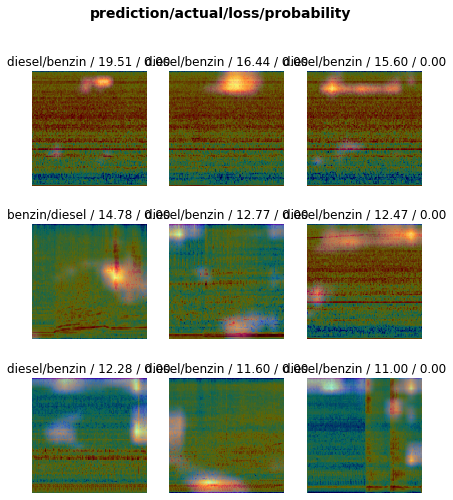

In [15]:
interp.plot_top_losses(9, figsize=(7,8), heatmap = True)

In [16]:
interp.top_losses(5)

torch.return_types.topk(
values=tensor([19.5100, 16.4433, 15.6037, 14.7794, 12.7704]),
indices=tensor([1139, 1622, 1508,  897, 1009]))

In [17]:
data.valid_ds.items[1139]

PosixPath('datasets/dataset1_5sec/valid/benzin/soundjay-car-ignition-1_3.jpg')

theme heatmap: 
.show_heatmap() function -> https://alexiej.github.io/deepnn/#imagecleaner
https://www.kaggle.com/daisukelab/verifying-cnn-models-with-cam-and-etc-fast-ai

# model in production

use testdataset? : https://forums.fast.ai/t/how-do-i-use-from-folder-to-accomodate-a-test-dataset/37273/7

In [32]:
from pathlib import Path
import os
test_file_list_diesel = list(Path(testdata+'/diesel').iterdir())
test_file_list_benzin = list(Path(testdata+'/benzin').iterdir())

test_file_list_diesel[0]
test_file_list_benzin[0]

PosixPath('datasets/dataset1_5sec/test/benzin/26 Forza Horizon 4 vs Forza Horizon 3 _ Cars Engine Sounds Direct Comparison_82.jpg')

In [0]:
learn.export()

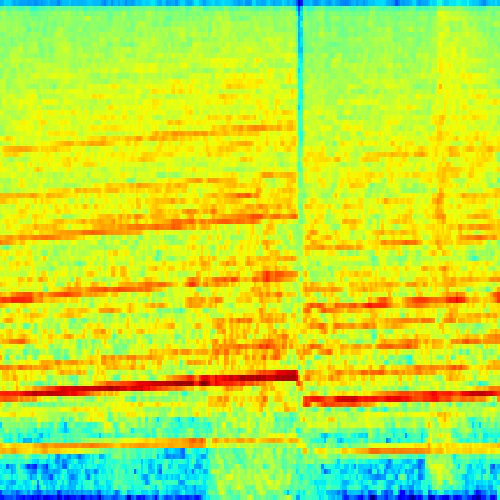

In [33]:
img_benzin = open_image(test_file_list_benzin[0])
img_benzin

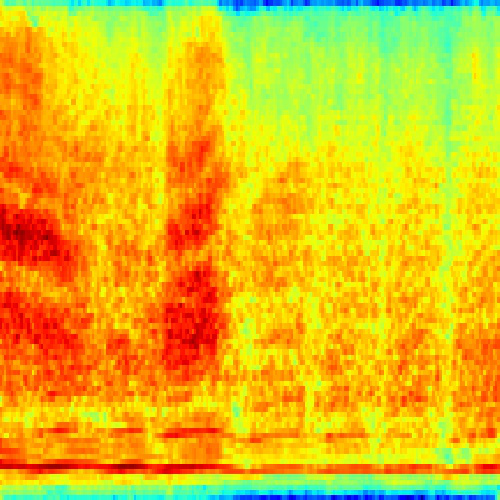

In [34]:
img_diesel = open_image(test_file_list_diesel[0])
img_diesel

In [36]:
pred_class = learn.predict(img_diesel)
pred_class

(Category diesel, tensor(1), tensor([0.0999, 0.9001]))

In [37]:
pred_class = learn.predict(img_benzin)
pred_class

(Category benzin, tensor(0), tensor([9.9996e-01, 4.1322e-05]))

In [53]:
img_test = open_image('./datasets/dataset1_5sec/valid/diesel/Mad Diesel Cars Compilation #3-zcG_8F9Pgvg_60.jpg')
pred_class = learn.predict(img_test)
str(pred_class[0]) == 'benzin'

True

In [57]:
def truelist(path_list, true_label):
    tlist = []
    for p in path_list:
        if str(learn.predict(open_image(p))[0]) == true_label:
            tlist.append(1)
        else:
            tlist.append(0)
    return tlist

In [54]:
loste = test_file_list_diesel[0:10]

In [59]:
tlist_diesel = truelist(test_file_list_diesel, 'diesel')

In [120]:
correct_d = sum(tlist_diesel)
print('Diesel: ' + str(correct_d/len(tlist_diesel)))

Diesel: 0.732776617954071


In [62]:
tlist_benzin = truelist(test_file_list_benzin, 'benzin')

In [119]:
correct_b = sum(tlist_benzin)
print('Benzin: ' + str(correct_b/len(tlist_benzin)))

Benzin: 0.8553921568627451


In [118]:
print('Overall: ' + str((correct_d+correct_b)/(len(tlist_benzin)+len(tlist_diesel))))

Overall: 0.7891770011273957
